In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Data from linear combination of latent variables + additional noise
# for this instance, 3 latent variables 9 observed.
# each latent variable is assumed to be independent and distributed normally with mean 0 and variance 1

#Generate 200 points from each latent distribution
latent_1 = np.random.normal(0, 1, 200)
latent_2 = np.random.normal(0, 1, 200)
latent_3 = np.random.normal(0, 1, 200)
#The strength of each latent variables effect on the observed variables
transformation_matrix = np.array([[0.3, 0.3, 0.4], [0.2, 0.3, 0.5], [0.7, 0.2, 0.1],
                                 [0.2, 0.2, 0.6], [0.1, 0.1, 0.8], [0.3, 0.6, 0.1],
                                 [0.4, 0.5, 0.1], [0.4, 0.4, 0.2], [0.9, 0.05, 0.05]])
#creating points out of the combination of latent variables weighted by their strengths
latent_matrix = np.column_stack([latent_1, latent_2, latent_3])
combined_points = np.dot(latent_matrix, transformation_matrix.T)

#add noise that we also assume is normally distributed
generated_data = combined_points + np.random.normal(0, 0.2, (200, 9))

#create dataframe
cols = [f'Variable {x+1}' for x in range(9)]
data_df = pd.DataFrame(generated_data, columns = cols)

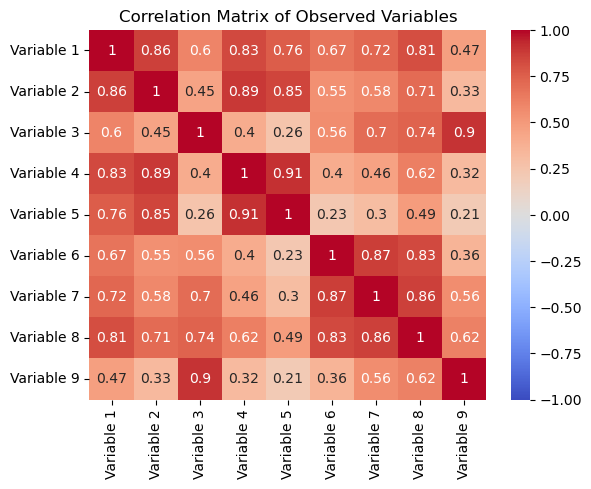

In [16]:
plt.figure()
sns.heatmap(data_df.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Observed Variables")
plt.show()